### Importing required libraries :

In [44]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#from random import normal
import math
from sklearn.metrics import accuracy_score,r2_score

### Creating gaussian distributions : 

In [45]:
def createdata(v):
    
    np.random.seed(0)
    dis1=np.random.normal(0,v,50)
    dis2=np.random.normal(5,v,50)
    dis3=np.random.normal(10,v,50)
    A=np.concatenate([dis1,dis2])
    X=np.concatenate([A,dis3])
    X
    return X


In [26]:
X=createdata(1)
X.shape

(150,)

### Plotting the data:

C:\Users\vaish\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


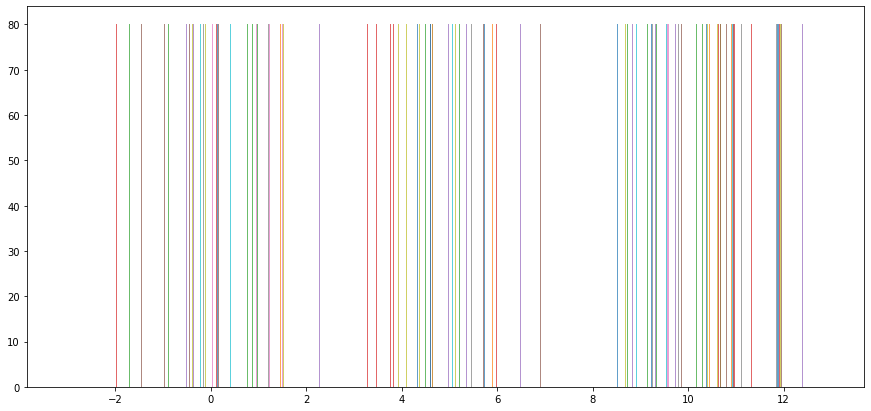

<Figure size 1080x504 with 0 Axes>

In [74]:

def plot_hist(data):
    plt.figure(figsize=(15,7))
    for x in data:
        plt.hist(x, bins = 80, normed = True, alpha = 0.7)
    #plt.xlim(-10, 20)
    plt.figure(figsize=(15,7))
    
plot_hist(X)


### Function to initialize random means, variances and prior probabilities: 

In [28]:
def initialize(X,K):
    
    m=np.array([2.,3.,7.])             #random means
    #m=np.random.choice(X,size=3)      
    v=np.ones((3))                     #random variances set to 1 initially
    w=np.ones((K))/K                   #random prior weights set to equal
    #posterior probability that each input belongs to each of the 3 gaussians
    posterior=np.zeros((len(X),K),dtype=float)
    return m,v,w,posterior

### True assignment of data samples to respective Gaussians and means:

In [29]:
Y=[0]*50 + [1]*50 + [2]*50
Y
M=[0,5,10]
V=[1,1,1]

### Function to evaluate accuracy:

In [40]:
def accuracy(pred,true,K):
    diff=[]
    summ=0    
    for j in range(K):
        #d=abs(pred[j]-true[j])/true[j]
        diff.append((abs(pred[j]-true[j])))
    summ=sum(diff)
    accu=round(((1-summ)*100),2)    
    #accu=summ
        
    return summ,accu

### Function to allocate the probability of each of the data points belonging to each one of the clusters(Soft Allocation):

In [87]:
def GMM(X,K,epochs):
    N=len(X)
    #K=3
    pi=math.pi
    iterations=epochs
    M=[0.,5.,10.]
    
    for iter in range(iterations):
        
        #Expection Step : Calculating Posterior probabilities for 
        for i in range(len(X)):
            for k in range(K):

                part1=1/math.sqrt(2*pi*(var[k]))
                part2=(-1/2)*((X[i]-means[k])**2)
                part3= part2/(var[k])
                part4=np.exp(part3)
                posterior[i][k]=part1 * part4

                #posterior[i][k]=wprior[k]*(1/math.sqrt(2*var[k]*pi))*(math.exp(-(1/2)*((X[i]-means[k])**2)))

            posterior[i]=posterior[i]/np.sum(posterior[i])
        
        
        #Maximization Step : Updating parameters : mean, variance, and prior probabilities :
        meanspred=[]
        varpred=[]
        diffmean=[]
        lossmean=[]
        for i in range(K):
            wprior[i]=np.sum(posterior[:,i])/N
            means[i]=np.dot(posterior[:,i],X[:].T)/(np.sum(posterior[:,i]))
            var[i]=np.dot(posterior[:,i],((X-means[i])**2).T)/(np.sum(posterior[:,i]))
            meanspred.append(means[i])
            varpred.append(var[i])
        
        ##### Retrieving Predicted class labels from posterior probabilities :
        li=[]
        for i in range(len(X)):
            li.append(np.argmax(posterior[i]))
        
        
        ######Accuracy Calculation for Mean and Variance at each iteration :
        meanloss,accumean=accuracy(meanspred,M,K)
        varloss,accuvar=accuracy(varpred,V,K)
        ######
        
        
        print("\n")    
        print("Epoch " + str(iter+1) + " : " + "prior probability ="+ str(wprior))
        print("Epoch " + str(iter+1) + " : " + "mean ="+ str(means))
        print("Epoch " + str(iter+1) + " : "+ "variance =" + str(var))
        
        
        #print(meanspred)
        print("Total mean loss is=> ", meanloss)
        #print("R2 score for Mean => ".format(round(r2_score(meanspred,M)*100)))
        print("R2 score of Means after Epoch {} : {}".format(iter+1,round((r2_score(meanspred,M)),2)))
        print("Total variance loss is=> ", varloss)
        print("R2 score of Variance after Epoch {} : {}".format(iter+1,round((r2_score(varpred,V)),2)))
        #print("Accuracy of variance after Epoch {} : {}%".format(iter+1, accuvar))
        totalaccuracy = round((accuracy_score(li, Y)*100),2)
        print("Accuracy of allocation after Epoch {} : {}%".format(iter+1, totalaccuracy))
        #totalaccuracy
        
        
    return (wprior, means,var,totalaccuracy,li)
    #means.shape


In [88]:
means,var,wprior,posterior=initialize(X,3)
#means,var,wprior,posterior.shape
wprior,means,var,totalaccuracy,li=GMM(X,3,4)



Epoch 1 : prior probability =[0.31686045 0.18882409 0.49431546]
Epoch 1 : mean =[0.33717436 3.66738246 8.75161024]
Epoch 1 : variance =[2.35235318 2.39087316 5.5254408 ]
Total mean loss is=>  0.19454544367706067
R2 score of Means after Epoch 1 : 0.9
Total variance loss is=>  0.4845778092646084
R2 score of Variance after Epoch 1 : -2.66
Accuracy of allocation after Epoch 1 : 82.0%


Epoch 2 : prior probability =[0.29596336 0.28383699 0.42019965]
Epoch 2 : mean =[0.07440818 4.23741447 9.28279348]
Epoch 2 : variance =[1.55502693 2.29544849 4.62908539]
Total mean loss is=>  0.10361334871334661
R2 score of Means after Epoch 2 : 0.97
Total variance loss is=>  0.36530405414035855
R2 score of Variance after Epoch 2 : -1.94
Accuracy of allocation after Epoch 2 : 94.0%


Epoch 3 : prior probability =[0.30453275 0.31415929 0.38130796]
Epoch 3 : mean =[0.01434501 4.55744772 9.67525195]
Epoch 3 : variance =[1.18304609 1.63451487 3.33138189]
Total mean loss is=>  0.0521096889002393
R2 score of Mea

###  Training Accuracy after last epoch :

In [89]:
finalaccuracy = round((accuracy_score(li, Y)*100),2)
print("Final Accuracy of allocation : {}%".format(finalaccuracy))
print("Number of samples classifed for Gaussians 0, 1, 2 : ",li.count(0),li.count(1),li.count(2))


Final Accuracy of allocation : 98.0%
Number of samples classifed for Gaussians 0, 1, 2 :  48 51 51


* Initially each of the Gaussians consisted of 50 data points. Here we can see that it successfully predicted and classified the total 150 data points in 3 respective Gaussians(0,1,2). 
* Here I ran my algortithm for 4 epochs since I noticed that after 4th epoch my algorithm started to show no change in parameters which are mean, variance and prior probabilities. 

### Trying different variances :

### Configuration 2:

#### For variance 4, that is S.D = 2 :

In [91]:
X2=createdata(2)
means,var,wprior,posterior=initialize(X2,3)
wprior,means,var,totalaccuracy2,li2=GMM(X2,3,10)
finalaccuracy2 = round((accuracy_score(li2, Y)*100),2)
print("Final Accuracy of allocation : {}%".format(finalaccuracy2))
print("Number of samples classifed for Gaussians 0, 1, 2 : ",li2.count(0),li2.count(1),li2.count(2))



Epoch 1 : prior probability =[0.30648201 0.19277336 0.50074463]
Epoch 1 : mean =[0.11791059 3.38532905 9.1104891 ]
Epoch 1 : variance =[4.84651547 1.70415693 7.15811978]
Total mean loss is=>  0.1748061620560036
R2 score of Means after Epoch 1 : 0.92
Total variance loss is=>  0.713919478115025
R2 score of Variance after Epoch 1 : -2.55
Accuracy of allocation after Epoch 1 : 74.0%


Epoch 2 : prior probability =[0.27949135 0.262496   0.45801265]
Epoch 2 : mean =[-0.07774198  3.70496959  9.38829045]
Epoch 2 : variance =[5.14716466 2.06819903 7.02706173]
Total mean loss is=>  0.13229879590704263
R2 score of Means after Epoch 2 : 0.95
Total variance loss is=>  0.7494950276779294
R2 score of Variance after Epoch 2 : -3.36
Accuracy of allocation after Epoch 2 : 78.0%


Epoch 3 : prior probability =[0.28189617 0.28496583 0.43313799]
Epoch 3 : mean =[-0.08778375  3.94299916  9.58561285]
Epoch 3 : variance =[4.95077873 2.35879901 6.63827745]
Total mean loss is=>  0.10394478235872709
R2 score o

### Configuration 3 :

#### For variance 6.25, that is S.D = 2.5 :

In [84]:
X3=createdata(2.5)
means,var,wprior,posterior=initialize(X3,3)
wprior,means,var,totalaccuracy3,li3=GMM(X3,3,10)
finalaccuracy3 = round((accuracy_score(li3, Y)*100),2)
print("Final Accuracy of allocation : {}%".format(finalaccuracy3))
print("Number of samples classifed for Gaussians 0, 1, 2 : ",li3.count(0),li3.count(1),li3.count(2))



Epoch 1 : prior probability =[0.30394701 0.17849251 0.51756048]
Epoch 1 : mean =[-0.13059147  3.3530637   9.18666587]
Epoch 1 : variance =[6.03227425 1.76626288 8.75574925]
Total mean loss is=>  0.1727241263729855
R2 score of means after Epoch 1 : 0.92
Total variance loss is=>  0.9036190918705664
R2 score of means after Epoch 1 : -2.47
Accuracy of allocation after Epoch 1 : 70.0%


Epoch 2 : prior probability =[0.27481004 0.25486875 0.4703212 ]
Epoch 2 : mean =[-0.27859314  3.68282801  9.46455624]
Epoch 2 : variance =[6.99052385 2.40775107 8.99076705]
Total mean loss is=>  0.14208059305441048
R2 score of means after Epoch 2 : 0.96
Total variance loss is=>  1.0259361311967683
R2 score of means after Epoch 2 : -3.47
Accuracy of allocation after Epoch 2 : 74.0%


Epoch 3 : prior probability =[0.27841973 0.2843063  0.43727397]
Epoch 3 : mean =[-0.21468993  3.97557914  9.70318628]
Epoch 3 : variance =[7.16601096 3.01721626 8.78699103]
Total mean loss is=>  0.10239496751199714
R2 score of 

### Configuration 4 : 

#### For variance 9, that is S.D = 3 :

In [86]:
X4=createdata(3)
means,var,wprior,posterior=initialize(X4,3)
wprior,means,var,totalaccuracy4,li4 = GMM(X4,3,10)
finalaccuracy4 = round((accuracy_score(li4, Y)*100),2)
print("Final Accuracy of allocation : {}%".format(finalaccuracy4))
print("Number of samples classifed for Gaussians 0, 1, 2 : ",li4.count(0),li4.count(1),li4.count(2))



Epoch 1 : prior probability =[0.30379591 0.16129193 0.53491216]
Epoch 1 : mean =[-0.41752964  3.32022977  9.28651244]
Epoch 1 : variance =[ 7.26556547  1.90157733 10.5107976 ]
Total mean loss is=>  0.1873858283991287
R2 score of means after Epoch 1 : 0.93
Total variance loss is=>  1.1118626931951328
R2 score of means after Epoch 1 : -2.45
Accuracy of allocation after Epoch 1 : 66.0%


Epoch 2 : prior probability =[0.27202643 0.24936382 0.47860975]
Epoch 2 : mean =[-0.52296372  3.70009393  9.60227255]
Epoch 2 : variance =[ 8.99009478  2.86158074 11.11711744]
Total mean loss is=>  0.14803981610184452
R2 score of means after Epoch 2 : 0.96
Total variance loss is=>  1.331252864313713
R2 score of means after Epoch 2 : -3.62
Accuracy of allocation after Epoch 2 : 72.67%


Epoch 3 : prior probability =[0.27711229 0.28848778 0.43439994]
Epoch 3 : mean =[-0.38087645  4.07237943  9.9145151 ]
Epoch 3 : variance =[ 9.60834796  3.74225517 11.1201174 ]
Total mean loss is=>  0.09293212794352215
R2 

* We can see a decrease in accuracies when we ran our algorithm for less number of epochs. In our algorithm, we stopped when our posterior probabilities showed almost no change. After trying different values for variance, we noticed that as variance increases, our GMM algorithm takes many iterations to converge. GMM is much more flexible allowing us to generate much better fitting distributions.